# Introduction
- KaggleのNMRコンペ(https://www.kaggle.com/c/champs-scalar-coupling/data)
- train, test, structureのEDA
- trainとtest内の分子構造がstructuresに入っているのかも確認してみる。

# import everything I nead :)

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


# Data Preparation

**check datasets**

In [2]:
dir_data = './data/champs-scalar-coupling/'
path_list = glob.glob(dir_data + '*')
path_list

['./data/champs-scalar-coupling/magnetic_shielding_tensors.csv',
 './data/champs-scalar-coupling/structures.csv',
 './data/champs-scalar-coupling/mulliken_charges.csv',
 './data/champs-scalar-coupling/scalar_coupling_contributions.csv',
 './data/champs-scalar-coupling/train.csv',
 './data/champs-scalar-coupling/structures',
 './data/champs-scalar-coupling/test.csv',
 './data/champs-scalar-coupling/sample_submission.csv',
 './data/champs-scalar-coupling/dipole_moments.csv',
 './data/champs-scalar-coupling/potential_energy.csv']

**load csv**

In [3]:
path = './data/champs-scalar-coupling/train.csv'
df_train = pd.read_csv(path)

In [4]:
path = './data/champs-scalar-coupling/test.csv'
df_test = pd.read_csv(path)

In [5]:
path = './data/champs-scalar-coupling/structures.csv'
df_struct = pd.read_csv(path)

# EDA
- null なし

---

## Basics

In [93]:
print(f'There are {df_train.shape[0]} rows in train data.')
print(f'There are {df_test.shape[0]} rows in test data.')

print(f"There are {df_train['molecule_name'].nunique()} distinct molecules in train data.")
print(f"There are {df_test['molecule_name'].nunique()} distinct molecules in test data.")
print(f"There are {df_train['type'].nunique()} unique types.")

There are 4658147 rows in train data.
There are 2505542 rows in test data.
There are 85003 distinct molecules in train data.
There are 45772 distinct molecules in test data.
There are 8 unique types.


### train

In [8]:
df_train.head(5)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


In [9]:
df_train.tail(5)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
4658142,4658142,dsgdb9nsd_133884,17,4,2JHC,3.543450
4658143,4658143,dsgdb9nsd_133884,17,5,3JHC,0.568997
4658144,4658144,dsgdb9nsd_133884,17,6,3JHC,1.173370
4658145,4658145,dsgdb9nsd_133884,17,7,2JHC,4.762010
4658146,4658146,dsgdb9nsd_133884,17,8,1JHC,117.934000


In [10]:
df_train.isnull().sum(axis=0)

id                          0
molecule_name               0
atom_index_0                0
atom_index_1                0
type                        0
scalar_coupling_constant    0
dtype: int64

In [20]:
df_train.describe()

,id,atom_index_0,atom_index_1,scalar_coupling_constant
count,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06
mean,2.329073e+06,1.335689e+01,5.883966e+00,1.592165e+01
std,1.344691e+06,3.267712e+00,4.993943e+00,3.494198e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-3.621860e+01
25%,1.164536e+06,1.100000e+01,2.000000e+00,-2.549780e-01
50%,2.329073e+06,1.300000e+01,5.000000e+00,2.281130e+00
75%,3.493610e+06,1.600000e+01,8.000000e+00,7.390655e+00
max,4.658146e+06,2.800000e+01,2.800000e+01,2.048800e+02


---
**preparation**

In [23]:
mole_names_train = df_train['molecule_name'].unique()
print('n_molecule_name in train:', len(mole_names_train))

n_molecule_name in train: 85003


---
### test

In [14]:
df_test.head(5)

,id,molecule_name,atom_index_0,atom_index_1,type
0,4658147,dsgdb9nsd_000004,2,0,2JHC
1,4658148,dsgdb9nsd_000004,2,1,1JHC
2,4658149,dsgdb9nsd_000004,2,3,3JHH
3,4658150,dsgdb9nsd_000004,3,0,1JHC
4,4658151,dsgdb9nsd_000004,3,1,2JHC


In [15]:
df_test.tail(5)

,id,molecule_name,atom_index_0,atom_index_1,type
2505537,7163684,dsgdb9nsd_133885,15,3,2JHC
2505538,7163685,dsgdb9nsd_133885,15,4,2JHC
2505539,7163686,dsgdb9nsd_133885,15,6,3JHC
2505540,7163687,dsgdb9nsd_133885,15,7,2JHC
2505541,7163688,dsgdb9nsd_133885,15,8,1JHC


In [16]:
df_test.isnull().sum(axis=0)

id               0
molecule_name    0
atom_index_0     0
atom_index_1     0
type             0
dtype: int64

In [21]:
df_test.describe()

,id,atom_index_0,atom_index_1
count,2.505542e+06,2.505542e+06,2.505542e+06
mean,5.910918e+06,1.335449e+01,5.877949e+00
std,7.232878e+05,3.272209e+00,4.992313e+00
min,4.658147e+06,1.000000e+00,0.000000e+00
25%,5.284532e+06,1.100000e+01,2.000000e+00
50%,5.910918e+06,1.300000e+01,5.000000e+00
75%,6.537303e+06,1.600000e+01,8.000000e+00
max,7.163688e+06,2.800000e+01,2.800000e+01


---
**preparation**

In [82]:
mole_names_test = df_test['molecule_name'].unique()
print('n_molecule_name in test:', len(mole_names_test))

n_molecule_name in test: 45772


---
**plot**

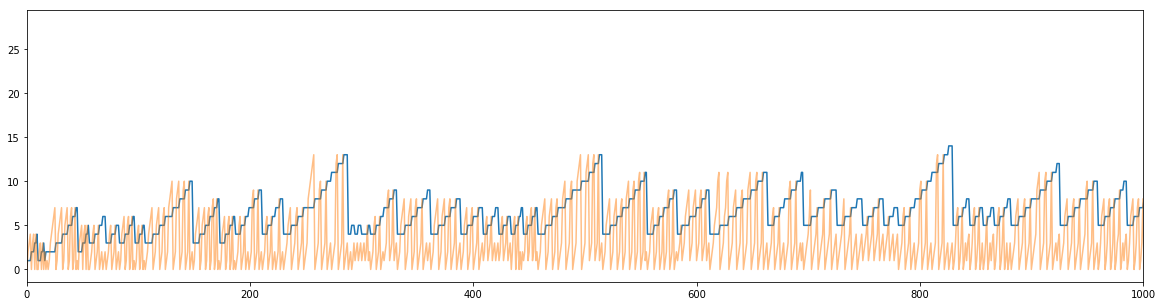

In [96]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.set_xlim(0, 1000)
ax.plot(df_train['atom_index_0'], label='index_0')
ax.plot(df_train['atom_index_1'], alpha=0.5, label='index_1')

## structures

In [13]:
df_struct.head(5)

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


In [14]:
df_struct.tail(5)

,molecule_name,atom_index,atom,x,y,z
2358652,dsgdb9nsd_133885,11,H,-1.454004,-0.967309,1.459246
2358653,dsgdb9nsd_133885,12,H,0.277779,-2.697872,0.195770
2358654,dsgdb9nsd_133885,13,H,2.515854,-1.151784,0.527369
2358655,dsgdb9nsd_133885,14,H,0.013699,1.199431,-1.680192
2358656,dsgdb9nsd_133885,15,H,1.260745,-1.246754,-1.906767


In [15]:
df_struct.isnull().sum(axis=0)

molecule_name    0
atom_index       0
atom             0
x                0
y                0
z                0
dtype: int64

In [17]:
df_struct.describe()

,atom_index,x,y,z
count,2.358657e+06,2.358657e+06,2.358657e+06,2.358657e+06
mean,8.757349e+00,9.489178e-02,-3.337381e-01,6.241504e-02
std,5.592487e+00,1.655271e+00,1.989152e+00,1.445870e+00
min,0.000000e+00,-9.234889e+00,-9.933938e+00,-9.134765e+00
25%,4.000000e+00,-8.746097e-01,-1.826156e+00,-8.424896e-01
50%,9.000000e+00,5.183615e-02,-4.035932e-01,1.093207e-02
75%,1.300000e+01,1.116101e+00,1.373660e+00,9.394357e-01
max,2.800000e+01,9.382240e+00,1.018196e+01,7.894733e+00


---
**preparation**

In [22]:
mole_names_struct = df_struct['molecule_name'].unique()
print('n_molecule_name in structures:', len(mole_names_struct))

n_molecule_name in structures: 130775


## Plot

**violinplot**

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Violinplot of scalar_coupling_constant by type')

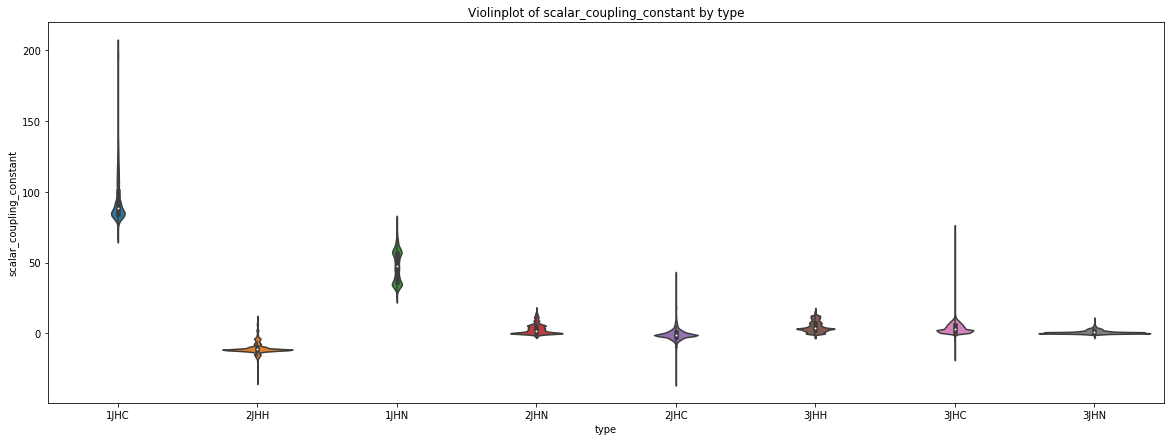

In [11]:
plt.figure(figsize=(20, 7))
sns.violinplot(x='type', y='scalar_coupling_constant', data=df_train)
plt.title('Violinplot of scalar_coupling_constant by type')

# train and structurs
- train 内の分子構造は、すべてstructuresに入っているのか？

In [72]:
df_mole_train = pd.DataFrame(mole_names_train, columns=['molecule_names'])
df_mole_struct = pd.DataFrame(mole_names_struct, columns=['molecule_names'])

In [73]:
df_struct_train = pd.merge(df_mole_struct, df_mole_train, on='molecule_names')
df_struct_train.head()

,molecule_names
0,dsgdb9nsd_000001
1,dsgdb9nsd_000002
2,dsgdb9nsd_000003
3,dsgdb9nsd_000005
4,dsgdb9nsd_000007


In [74]:
len(df_mole_train)

85003

In [75]:
len(df_mole_struct)

130775

In [76]:
len(df_struct_train)

85003

---> df_struct_train を見る限りtrainデータ内の分子構造は、structures内にあるみたい。

# test and structurs
- test 内の分子構造は、すべてstructuresに入っているのか？

In [83]:
df_mole_test = pd.DataFrame(mole_names_test, columns=['molecule_names'])
df_mole_struct = pd.DataFrame(mole_names_struct, columns=['molecule_names'])

In [84]:
df_struct_test = pd.merge(df_mole_struct, df_mole_test, on='molecule_names')

In [88]:
len(df_mole_test)

45772

In [90]:
len(df_mole_struct)

130775

In [92]:
len(df_struct_test)

45772

---> testの構造もstruct内に存在する